In [19]:
import numpy as np

# Importing standard Qiskit libralies
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2, FakeQasmBackend


In [20]:
import qiskit
qiskit.__version__

'1.1.1'

In [21]:
# 量子回路の初期化
circuit = QuantumCircuit(2)

# 量子回路の組み立て
circuit.h(0) # アダマールゲート行列を適用
circuit.cx(0,1) # CNOTを適用

# 測定
circuit.measure_all()

In [22]:
# 実行と結果取得
backend = GenericBackendV2(num_qubits=2) # Generate a 2-qubit simulated backend
transpiled_circuit = transpile(circuit, backend=backend) # デバイスの状況に合わせて量子回路を最適化
job = backend.run(transpiled_circuit) # 量子プログラムを実行
result = job.result() # 結果を取得
print(result.get_counts()) # 結果をテキスト表示
                            

{'00': 481, '11': 543}


/home/teruterubohz/Qiskit/lib/python3.10/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


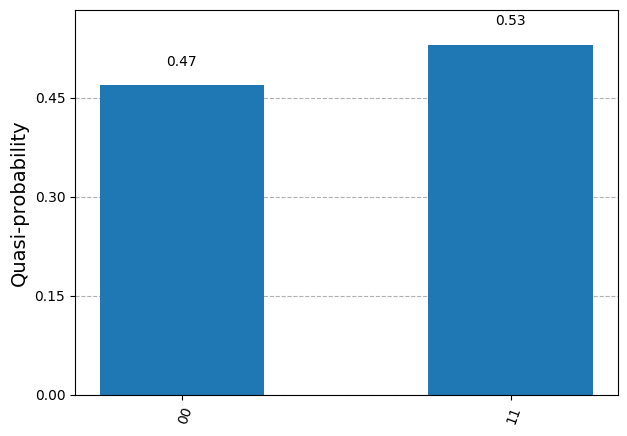

In [24]:
# 確率分布を表示   
plot_distribution(job.result().get_counts())

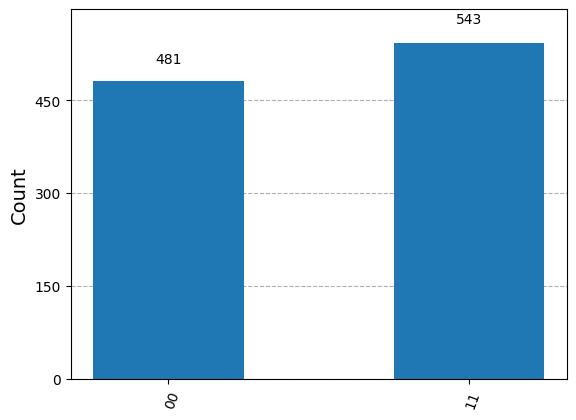

In [25]:
# ヒストグラムを表示   
plot_histogram(job.result().get_counts())

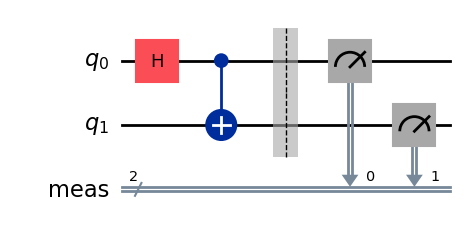

In [26]:
# 量子回路を描画 mpl
circuit.draw(output="mpl")

In [27]:
# 量子回路を描画 text
circuit.draw(output="text")

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [29]:
# 量子回路を描画 latex
print(circuit)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
